In [8]:
#libraries
import pandas as pd
import numpy as np
import nltk
import re

In [2]:

#read data
df = pd.read_csv("balanced_ai_human_prompts.csv")
df.head()

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [3]:
#shape of the data
df.shape

(2750, 2)

In [4]:
#check for missing values
df.isnull().sum()

text         0
generated    0
dtype: int64

In [5]:
#check for duplicates
df.duplicated().sum()

330

In [6]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(2420, 2)

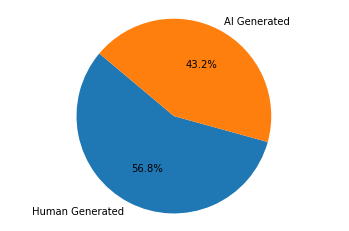

In [11]:
#value counts
value = df['generated'].value_counts()
labels  = ['Human Generated','AI Generated']

#diisplay pie chart
import matplotlib.pyplot as plt
plt.pie(value, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [12]:
X = df['text']
y = df['generated']

In [13]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#convert text into numeric form
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [15]:
#import models
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectors, y_train)
#predict
y_pred = model.predict(X_test_vectors)
#accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9834710743801653
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       295
           1       1.00      0.96      0.98       189

    accuracy                           0.98       484
   macro avg       0.99      0.98      0.98       484
weighted avg       0.98      0.98      0.98       484

Confusion Matrix:
 [[295   0]
 [  8 181]]


## With an accuracy of around 98%, the Multinomial Naive Bayes model performs well in distinguishing between AI-generated and human-generated text based on TF-IDF features. Further tuning and testing with other models could potentially improve performance even more.